<a href="https://colab.research.google.com/github/Pushpa-9392/Laptop_Price_Prediction/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [34]:
from google.colab import files
uploaded = files.upload()


Saving laptop_dataset_3000.csv to laptop_dataset_3000 (1).csv


In [103]:
df = pd.read_csv("laptop_dataset_3000.csv")   # change file name if different
df.head() # Display first 5 Rows


Sr no   Brand      Name   Price Processor_Name Processor_Brand  \
0      1      HP  Laptop-1   33309        Ryzen 5             AMD   
1      2   Apple  Laptop-2  110445             i7             AMD   
2      3  Lenovo  Laptop-3   90626        Ryzen 7           Apple   
3      4    Asus  Laptop-4   36982        Ryzen 5           Intel   
4      5    Acer  Laptop-5   60638             i7           Intel   

  RAM_Expandable   RAM RAM_TYPE  Ghz Display_type    Display       GPU  \
0            Yes  32GB     DDR4  3.5          IPS  13.3 inch  GTX 1650   
1            Yes  32GB     DDR4  3.0          LED    16 inch  GTX 1650   
2            Yes  16GB     DDR4  2.3          IPS  15.6 inch  RTX 3050   
3             No  32GB     DDR5  2.2         OLED    16 inch  RTX 3050   
4             No   8GB     DDR4  2.9          IPS  13.3 inch  RTX 3050   

  GPU Brand    SSD  HDD Adapter  Battery_Life  
0    NVIDIA  512GB  1TB     65W            10  
1    NVIDIA  512GB  2TB    120W            12  
2       AMD    1TB  2TB     90W             7  
3     Intel  512GB  2TB     65W             7  
4     Intel  512GB  NaN    120W             7

In [104]:
df.shape # it gives no.of rows and no.of columns in dataset

(3000, 18)

In [105]:
df.describe() # it shows basic statistics of numerical column like mean(),std()

Sr no          Price          Ghz  Battery_Life
count  3000.000000    3000.000000  3000.000000   3000.000000
mean   1500.500000   90460.179667     3.155567      8.593000
std     866.169729   34571.913293     0.781575      2.285554
min       1.000000   30022.000000     1.800000      5.000000
25%     750.750000   61068.000000     2.500000      7.000000
50%    1500.500000   91558.000000     3.100000      9.000000
75%    2250.250000  120167.000000     3.800000     11.000000
max    3000.000000  149932.000000     4.500000     12.000000

In [106]:
df.info() #Check Data set information if any null values are there or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sr no            3000 non-null   int64  
 1   Brand            3000 non-null   object 
 2   Name             3000 non-null   object 
 3   Price            3000 non-null   int64  
 4   Processor_Name   3000 non-null   object 
 5   Processor_Brand  3000 non-null   object 
 6   RAM_Expandable   3000 non-null   object 
 7   RAM              3000 non-null   object 
 8   RAM_TYPE         3000 non-null   object 
 9   Ghz              3000 non-null   float64
 10  Display_type     3000 non-null   object 
 11  Display          3000 non-null   object 
 12  GPU              3000 non-null   object 
 13  GPU Brand        3000 non-null   object 
 14  SSD              3000 non-null   object 
 15  HDD              2045 non-null   object 
 16  Adapter          3000 non-null   object 
 17  Battery_Life  

In [107]:
df.isnull().sum()  #Check minssing values

Sr no                0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  0
GPU Brand            0
SSD                  0
HDD                955
Adapter              0
Battery_Life         0
dtype: int64

In [108]:
df.columns #it shows all columns in the dataset

Index(['Sr no', 'Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand',
       'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display',
       'GPU', 'GPU Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life'],
      dtype='object')

In [109]:
df.drop(columns=["Sr no"])

Brand         Name   Price Processor_Name Processor_Brand  \
0          HP     Laptop-1   33309        Ryzen 5             AMD   
1       Apple     Laptop-2  110445             i7             AMD   
2      Lenovo     Laptop-3   90626        Ryzen 7           Apple   
3        Asus     Laptop-4   36982        Ryzen 5           Intel   
4        Acer     Laptop-5   60638             i7           Intel   
5          HP     Laptop-6   35214             i3             AMD   
6        Acer     Laptop-7  132784             M1           Intel   
7        Dell     Laptop-8   80404             M1           Apple   
8      Lenovo     Laptop-9   91275             i7           Apple   
9          HP    Laptop-10  115262             i7           Apple   
10      Apple    Laptop-11  137049             M2           Intel   
11       Asus    Laptop-12  124541             M1           Apple   
12    Samsung    Laptop-13   82736             i3             AMD   
13      Apple    Laptop-14   66564             i3           Apple   
14         HP    Laptop-15  119969             i7             AMD   
15       Dell    Laptop-16   51140             M2             AMD   
16      Apple    Laptop-17   34202             i5           Apple   
17      Apple    Laptop-18  143648             i7           Intel   
18      Apple    Laptop-19   56714        Ryzen 5           Intel   
19         HP    Laptop-20   90708             M1             AMD   
20       Dell    Laptop-21   31435             i5           Apple   
21    Samsung    Laptop-22  116774        Ryzen 7             AMD   
22        MSI    Laptop-23   43515        Ryzen 5           Intel   
23        MSI    Laptop-24  149527             i7             AMD   
24     Lenovo    Laptop-25   77236        Ryzen 5           Apple   
25         HP    Laptop-26  127119             M1           Apple   
26        MSI    Laptop-27   68903             i3           Apple   
27      Apple    Laptop-28   62583             i5             AMD   
28      Apple    Laptop-29  107184             i3           Intel   
29       Acer    Laptop-30  123486        Ryzen 5             AMD   
30    Samsung    Laptop-31   99262        Ryzen 7           Intel   
31       Asus    Laptop-32   77822        Ryzen 5           Apple   
32       Asus    Laptop-33  104349             M1             AMD   
33      Apple    Laptop-34  133197             M1             AMD   
34    Samsung    Laptop-35   34603             i5           Intel   
35       Asus    Laptop-36  138678        Ryzen 5             AMD   
36      Apple    Laptop-37   60904             i3           Apple   
37     Lenovo    Laptop-38  131421        Ryzen 7             AMD   
38       Acer    Laptop-39  144578             i3           Intel   
39        MSI    Laptop-40   85120             i5             AMD   
40       Asus    Laptop-41   68285             M2             AMD   
41        MSI    Laptop-42   58097             M1           Intel   
42         HP    Laptop-43  134050        Ryzen 7             AMD   
43       Dell    Laptop-44   91444        Ryzen 5             AMD   
44      Apple    Laptop-45  124492        Ryzen 5           Intel   
45       Dell    Laptop-46   73454        Ryzen 7           Apple   
46     Lenovo    Laptop-47   81161        Ryzen 7           Apple   
47       Dell    Laptop-48  146858        Ryzen 5             AMD   
48       Asus    Laptop-49   94575             M2           Intel   
49     Lenovo    Laptop-50   64013             i3           Intel   
50       Asus    Laptop-51   31311             i5             AMD   
51       Dell    Laptop-52   42116             i5             AMD   
52       Dell    Laptop-53  104306             i5             AMD   
53       Asus    Laptop-54  129073        Ryzen 5             AMD   
54        MSI    Laptop-55   86794        Ryzen 5             AMD   
55        MSI    Laptop-56  137279             M2           Apple   
56         HP    Laptop-57   76634             M2             AMD   
57    

In [110]:
# df.drop(columns=["Sr no"])
# df.columns
df.drop("Sr no", axis=1, inplace=True)


In [111]:
df.columns #Here Sr no is Remove

Index(['Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand',
       'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display',
       'GPU', 'GPU Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life'],
      dtype='object')

In [112]:
df.insert(0,"Sr no",range(1,len(df)+1))  #If we want to create First column as Sr no
df.columns

Index(['Sr no', 'Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand',
       'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display',
       'GPU', 'GPU Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life'],
      dtype='object')

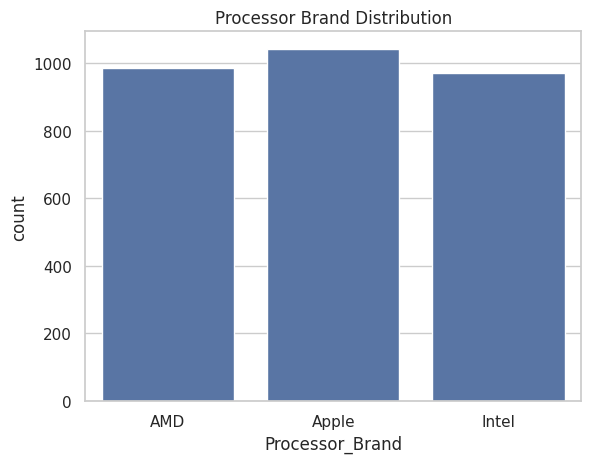

In [113]:
sns.countplot(x="Processor_Brand", data=df)
plt.title("Processor Brand Distribution")
plt.show()


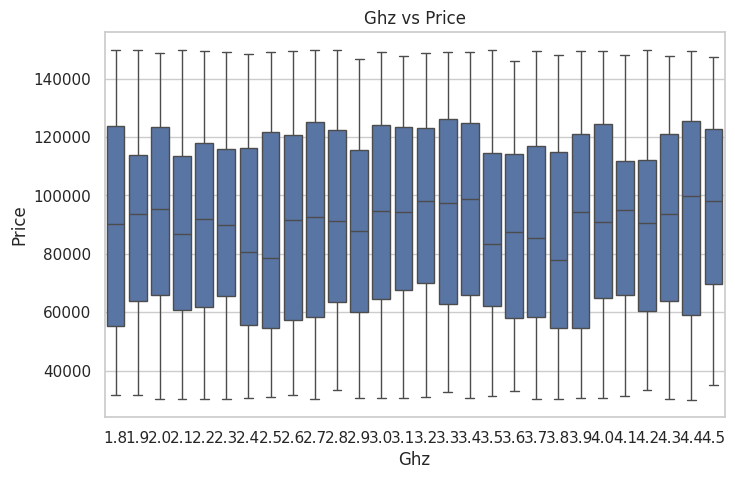

In [115]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Ghz", y="Price", data=df)
plt.title("Ghz vs Price")
plt.show()


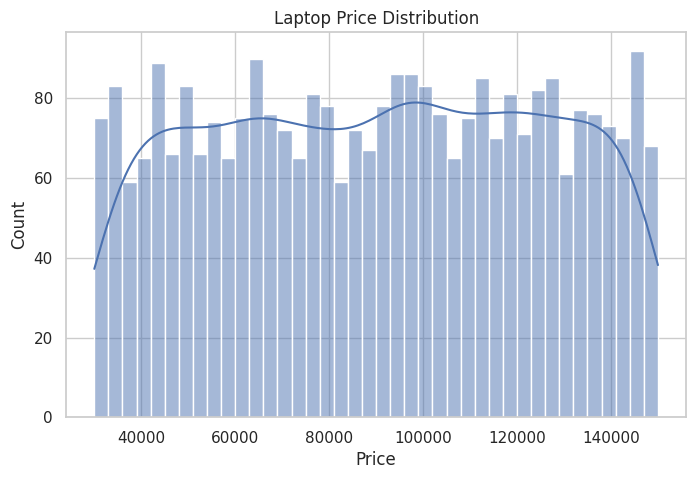

In [116]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=40, kde=True)
plt.title("Laptop Price Distribution")
plt.show()


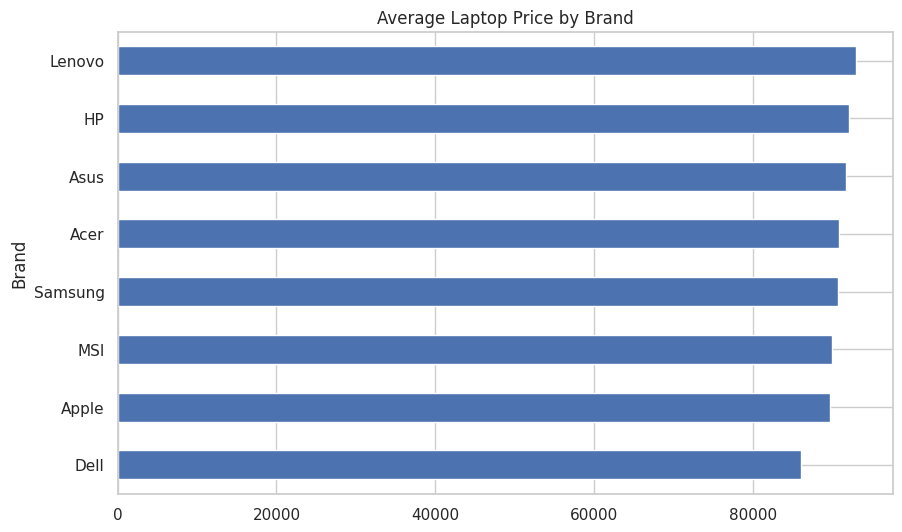

In [117]:
brand_price = df.groupby("Brand")["Price"].mean().sort_values()

plt.figure(figsize=(10,6))
brand_price.plot(kind="barh")
plt.title("Average Laptop Price by Brand")
plt.show()


In [119]:
df.groupby("RAM")["Price"].mean()


RAM
16GB    91389.176778
32GB    90773.096045
8GB     89217.370672
Name: Price, dtype: float64

In [120]:
df.groupby("Processor_Brand")["Price"].mean()


Processor_Brand
AMD      89217.110548
Apple    90942.230105
Intel    91204.657055
Name: Price, dtype: float64

In [151]:
df[df["Price"] < 50000][["Brand","Name","RAM","SSD","HDD","Price"]].head(10)


Brand       Name  RAM  SSD  HDD  Price
0        HP   Laptop-1   32  512  1.0  33309
3      Asus   Laptop-4   32  512  2.0  36982
5        HP   Laptop-6   16    1  NaN  35214
16    Apple  Laptop-17   16    1  NaN  34202
20     Dell  Laptop-21    8  512  2.0  31435
22      MSI  Laptop-23   16  512  NaN  43515
34  Samsung  Laptop-35    8  512  2.0  34603
50     Asus  Laptop-51    8  256  NaN  31311
51     Dell  Laptop-52    8  512  1.0  42116
58     Asus  Laptop-59    8  512  NaN  40162

In [122]:
df.sort_values("Battery_Life", ascending=False)[["Brand","Name","Battery_Life","Price"]].head(10)


Brand         Name  Battery_Life   Price
2981     Acer  Laptop-2982            12   89910
8      Lenovo     Laptop-9            12   91275
2973   Lenovo  Laptop-2974            12   54130
9          HP    Laptop-10            12  115262
1       Apple     Laptop-2            12  110445
12    Samsung    Laptop-13            12   82736
2992     Acer  Laptop-2993            12   64387
827      Asus   Laptop-828            12   74730
825      Dell   Laptop-826            12  108781
844       MSI   Laptop-845            12  127628

In [153]:
df["RAM"] = df["RAM"].str.replace("GB", "")  #If you want to convert GB to int like 32GB to 32
df["RAM"] = df["RAM"].astype(float)
df.head()

AttributeError: Can only use .str accessor with string values!

In [149]:
df["HDD"] = df["HDD"].str.replace("TB", "GB")
df["HDD"] = df["HDD"].str.replace("GB", "")
df["HDD"] = df["HDD"].astype(float)

AttributeError: Can only use .str accessor with string values!

In [150]:
df.head()

Sr no   Brand      Name   Price Processor_Name Processor_Brand  \
0      1      HP  Laptop-1   33309        Ryzen 5             AMD   
1      2   Apple  Laptop-2  110445             i7             AMD   
2      3  Lenovo  Laptop-3   90626        Ryzen 7           Apple   
3      4    Asus  Laptop-4   36982        Ryzen 5           Intel   
4      5    Acer  Laptop-5   60638             i7           Intel   

  RAM_Expandable  RAM RAM_TYPE  Ghz Display_type    Display       GPU  \
0            Yes   32     DDR4  3.5          IPS  13.3 inch  GTX 1650   
1            Yes   32     DDR4  3.0          LED    16 inch  GTX 1650   
2            Yes   16     DDR4  2.3          IPS  15.6 inch  RTX 3050   
3             No   32     DDR5  2.2         OLED    16 inch  RTX 3050   
4             No    8     DDR4  2.9          IPS  13.3 inch  RTX 3050   

  GPU Brand  SSD  HDD Adapter  Battery_Life  
0    NVIDIA  512  1.0     65W            10  
1    NVIDIA  512  2.0    120W            12  
2       AMD    1  2.0     90W             7  
3     Intel  512  2.0     65W             7  
4     Intel  512  NaN    120W             7

In [154]:
df[df["RAM"]>=16][["Brand","Name","RAM","Price"]].sort_values("Price")


Brand         Name  RAM   Price
497      Acer   Laptop-498   16   30149
1821     Asus  Laptop-1822   16   30206
2686       HP  Laptop-2687   32   30210
842     Apple   Laptop-843   16   30249
74       Dell    Laptop-75   32   30249
629    Lenovo   Laptop-630   16   30274
433      Asus   Laptop-434   16   30408
285       MSI   Laptop-286   16   30453
1001      MSI  Laptop-1002   16   30513
2109  Samsung  Laptop-2110   16   30553
1165     Asus  Laptop-1166   16   30570
345       MSI   Laptop-346   32   30599
1304      MSI  Laptop-1305   32   30672
1410   Lenovo  Laptop-1411   32   30676
2857  Samsung  Laptop-2858   16   30696
1115       HP  Laptop-1116   16   30711
962     Apple   Laptop-963   32   30795
1306     Dell  Laptop-1307   32   30877
2461   Lenovo  Laptop-2462   32   30886
2067    Apple  Laptop-2068   16   30991
787      Asus   Laptop-788   32   31055
2291       HP  Laptop-2292   16   31085
2141     Dell  Laptop-2142   16   31179
2594     Acer  Laptop-2595   16   31209
951      Dell   Laptop-952   32   31274
491      Asus   Laptop-492   16   31292
1703     Asus  Laptop-1704   32   31326
2502    Apple  Laptop-2503   16   31366
129      Dell   Laptop-130   32   31411
2268    Apple  Laptop-2269   32   31439
1029      MSI  Laptop-1030   32   31479
650      Acer   Laptop-651   16   31552
2796   Lenovo  Laptop-2797   16   31587
328      Asus   Laptop-329   32   31609
2282     Asus  Laptop-2283   32   31633
1759       HP  Laptop-1760   32   31649
1769     Asus  Laptop-1770   16   31653
1669    Apple  Laptop-1670   16   31807
1651  Samsung  Laptop-1652   32   31818
154     Apple   Laptop-155   32   31926
2168     Dell  Laptop-2169   16   31931
1946     Acer  Laptop-1947   32   32017
2817     Asus  Laptop-2818   32   32050
1476     Dell  Laptop-1477   32   32246
1032      MSI  Laptop-1033   16   32391
2603   Lenovo  Laptop-2604   32   32652
1170     Acer  Laptop-1171   16   32816
2741   Lenovo  Laptop-2742   16   32830
1475    Apple  Laptop-1476   32   32871
2121    Apple  Laptop-2122   16   32879
700      Acer   Laptop-701   16   32892
1819     Acer  Laptop-1820   32   32970
695   Samsung   Laptop-696   32   32991
2651   Lenovo  Laptop-2652   32   32997
2255     Acer  Laptop-2256   32   33078
838      Dell   Laptop-839   32   33112
1676     Acer  Laptop-1677   32   33173
1519  Samsung  Laptop-1520   32   33194
2938    Apple  Laptop-2939   16   33222
2784       HP  Laptop-2785   32   33243
288     Apple   Laptop-289   32   33282
684     Apple   Laptop-685   32   33308
0          HP     Laptop-1   32   33309
147     Apple   Laptop-148   16   33311
316      Dell   Laptop-317   32   33368
722   Samsung   Laptop-723   16   33375
805      Dell   Laptop-806   32   33385
2014       HP  Laptop-2015   16   33437
1898      MSI  Laptop-1899   32   33583
2547     Asus  Laptop-2548   32   33602
2176       HP  Laptop-2177   16   33722
959      Acer   Laptop-960   32   33780
1354       HP  Laptop-1355   16   33798
2437  Samsung  Laptop-2438   32   34180
1041     Asus  Laptop-1042   32   34196
16      Apple    Laptop-17   16   34202
257    Lenovo   Laptop-258   32   34215
980      Dell   Laptop-981   32   34315
219    Lenovo   Laptop-220   32   34469
2187     Acer  Laptop-2188   16   34594
2935  Samsung  Laptop-2936   32   34615
2062      MSI  Laptop-2063   32   34648
502      Dell   Laptop-503   16   34667
2102  Samsung  Laptop-2103   16   34701
1226       HP  Laptop-1227   16   34853
2195      MSI  Laptop-2196   16   34858
258      Asus   Laptop-259   32   34867
1360     Dell  Laptop-1361   32   34914
347      Dell   Laptop-348   32   34915
1505     Acer  Laptop-1506   32   34947
1719  Samsung  Laptop-1720   32   35108
854       MSI   Laptop-855   32   35141
5          HP     Laptop-6   16   35214
2532   Lenovo  Laptop-2533   32   35257
2494    Apple  Laptop-2495   16   35323
306     Apple   Laptop-307   32   35364
2056     Dell  Laptop-2057   16   35366
2285       HP  Laptop-2286   16   35567
1073     Dell  Laptop-1074   16   35611
2468    

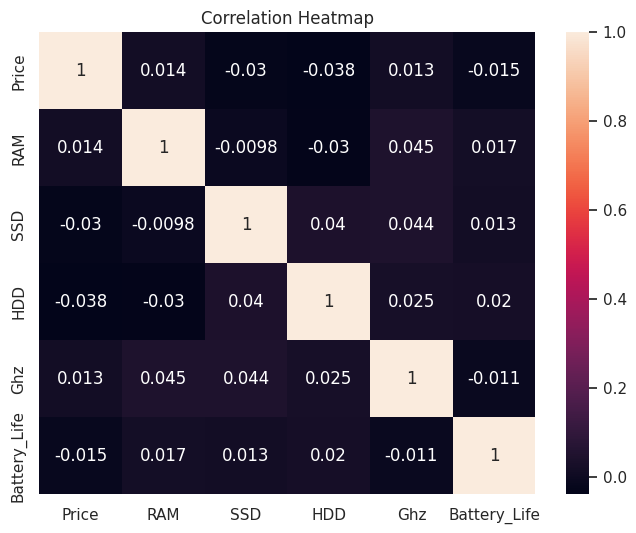

In [155]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Price","RAM","SSD","HDD","Ghz","Battery_Life"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [156]:
#Clean Price Columns
#df["Price"] = df["Price"].str.replace("₹","").str.replace(",","").astype(float)
df["Price"].dtype
df["Price"] = df["Price"].astype(float)
df["Price"].head(20)

0      33309.0
1     110445.0
2      90626.0
3      36982.0
4      60638.0
5      35214.0
6     132784.0
7      80404.0
8      91275.0
9     115262.0
10    137049.0
11    124541.0
12     82736.0
13     66564.0
14    119969.0
15     51140.0
16     34202.0
17    143648.0
18     56714.0
19     90708.0
Name: Price, dtype: float64

In [157]:
df = df[["Brand", "Price"]] #Only show which columns are want
df

Brand     Price
0          HP   33309.0
1       Apple  110445.0
2      Lenovo   90626.0
3        Asus   36982.0
4        Acer   60638.0
5          HP   35214.0
6        Acer  132784.0
7        Dell   80404.0
8      Lenovo   91275.0
9          HP  115262.0
10      Apple  137049.0
11       Asus  124541.0
12    Samsung   82736.0
13      Apple   66564.0
14         HP  119969.0
15       Dell   51140.0
16      Apple   34202.0
17      Apple  143648.0
18      Apple   56714.0
19         HP   90708.0
20       Dell   31435.0
21    Samsung  116774.0
22        MSI   43515.0
23        MSI  149527.0
24     Lenovo   77236.0
25         HP  127119.0
26        MSI   68903.0
27      Apple   62583.0
28      Apple  107184.0
29       Acer  123486.0
30    Samsung   99262.0
31       Asus   77822.0
32       Asus  104349.0
33      Apple  133197.0
34    Samsung   34603.0
35       Asus  138678.0
36      Apple   60904.0
37     Lenovo  131421.0
38       Acer  144578.0
39        MSI   85120.0
40       Asus   68285.0
41        MSI   58097.0
42         HP  134050.0
43       Dell   91444.0
44      Apple  124492.0
45       Dell   73454.0
46     Lenovo   81161.0
47       Dell  146858.0
48       Asus   94575.0
49     Lenovo   64013.0
50       Asus   31311.0
51       Dell   42116.0
52       Dell  104306.0
53       Asus  129073.0
54        MSI   86794.0
55        MSI  137279.0
56         HP   76634.0
57         HP  145704.0
58       Asus   40162.0
59    Samsung  110155.0
60      Apple   43482.0
61      Apple   64547.0
62        MSI  124785.0
63    Samsung   89603.0
64        MSI  146055.0
65       Dell  142633.0
66      Apple   77269.0
67       Asus  139323.0
68       Acer   87123.0
69       Asus   79710.0
70         HP   48408.0
71     Lenovo   36158.0
72       Asus  123123.0
73       Asus   55972.0
74       Dell   30249.0
75         HP  111244.0
76        MSI  125977.0
77        MSI  128250.0
78        MSI   37802.0
79       Dell  101930.0
80       Dell   75077.0
81       Acer  146091.0
82     Lenovo  117810.0
83       Asus   46637.0
84         HP  135806.0
85         HP   40186.0
86       Acer   47991.0
87        MSI   50996.0
88      Apple  138950.0
89       Dell   30289.0
90         HP   51236.0
91       Acer   90545.0
92       Dell  112692.0
93       Dell   68321.0
94       Asus   96996.0
95       Acer  105091.0
96     Lenovo   98174.0
97     Lenovo   83463.0
98         HP  105703.0
99       Acer   73707.0
100      Acer  123912.0
101    Lenovo   58329.0
102      Dell   41473.0
103      Asus   62763.0
104      Acer  104516.0
105       MSI  121602.0
106      Acer  142668.0
107      Acer  146462.0
108       MSI   99475.0
109      Dell   65324.0
110     Apple   98280.0
111      Asus  117308.0
112    Lenovo   69970.0
113   Samsung   51146.0
114       MSI   75123.0
115     Apple  134554.0
116       MSI  147406.0
117   Samsung  114950.0
118     Apple   75274.0
119      Dell   87267.0
120     Apple  110560.0
121     Apple  109069.0
122      Acer  110852.0
123      Acer   81480.0
124      Acer  132905.0
125       MSI   95640.0
126        HP   56792.0
127      Asus   89292.0
128      Asus  133206.0
129      Dell   31411.0
130   Samsung   68767.0
131    Lenovo   79870.0
132   Samsung  139240.0
133       MSI  103321.0
134   Samsung  124924.0
135      Acer   98036.0
136      Acer  106893.0
137       MSI  134215.0
138      Asus   86451.0
139        HP   45407.0
140    Lenovo  110474.0
141        HP  110806.0
142       MSI   45026.0
143      Acer   81026.0
144        HP   84460.0
145   Samsung  140136.0
146        HP   92549.0
147     Apple   33311.0
148      Asus   96160.0
149    Lenovo   55640.0
150      Dell   70682.0
151        HP   95440.0
152   Samsung   38297.0
153        HP   90702.0
154     Apple   31926.0
155      Acer   59552.0
156       MSI  101009.0
157       MSI   50755.0
158   Samsung  131934.0
159       MSI  149756.0
160    Lenovo  135117.0
161      Asus  103360.0
162    Lenovo   72603.0
163       MSI  123282.0
164        HP  100417.0
165     Apple   98414.0
